In [ ]:
import pandas as pd

# Load the new CSV file
file_path = r'C:\Users\powerX\Downloads\college_sales_large.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows
print("📊 First 5 Rows of the Dataset:")
print(data.head())

# Display dataset information
print("\n🛠️ Dataset Info:")
print(data.info())

# Display summary statistics
print("\n📈 Summary Statistics:")
print(data.describe())


📊 First 5 Rows of the Dataset:
         Date     Product    Category  Quantity  Price  Revenue
0  2024-03-01      Stamps  Stationary        29  24888   721752
1  2024-03-01   Donations     Revenue        20  37186   743720
2  2024-03-01    Cabinets   Furniture        28  14859   416052
3  2024-03-01      Tables   Furniture        39  17022   663858
4  2024-03-02  Paper Rims  Stationary        20  46393   927860

🛠️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1541 non-null   object
 1   Product   1541 non-null   object
 2   Category  1541 non-null   object
 3   Quantity  1541 non-null   int64 
 4   Price     1541 non-null   int64 
 5   Revenue   1541 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 72.4+ KB
None

📈 Summary Statistics:
          Quantity         Price       Revenue
count  1541.000000   1541.00000

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1541 non-null   object
 1   Product   1541 non-null   object
 2   Category  1541 non-null   object
 3   Quantity  1541 non-null   int64 
 4   Price     1541 non-null   int64 
 5   Revenue   1541 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 72.4+ KB


In [ ]:
data.describe()


,Quantity,Price,Revenue
count,1541.000000,1541.000000,1.541000e+03
mean,49.926022,25092.881246,1.250853e+06
std,28.691842,14344.858358,1.080847e+06
min,1.000000,168.000000,2.810000e+03
25%,24.000000,12705.000000,3.852060e+05
50%,50.000000,24927.000000,9.604560e+05
75%,74.000000,37694.000000,1.864500e+06
max,100.000000,49992.000000,4.940694e+06


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("\n🔍 Missing Values:\n", missing_values)



🔍 Missing Values:
 Date        0
Product     0
Category    0
Quantity    0
Price       0
Revenue     0
dtype: int64


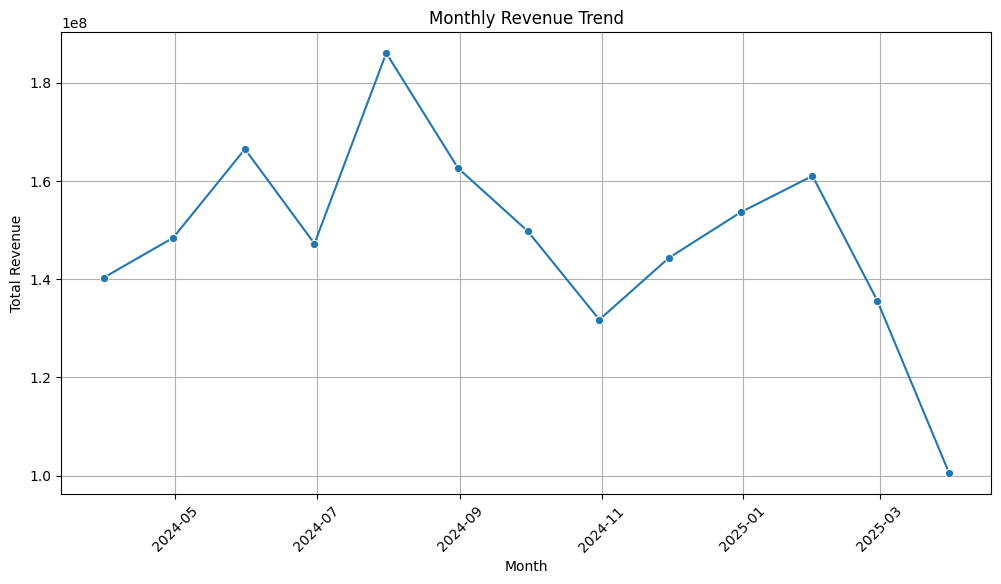

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Ensure Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# ✅ Resample by month-end frequency
monthly_sales = data.resample('ME', on='Date').sum().reset_index()

# ✅ Plotting the monthly sales trend
plt.figure(figsize=(12, 6))

# 🔥 Use 'data=' parameter to specify the dataset
sns.lineplot(x='Date', y='Revenue', data=monthly_sales, marker='o')

plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


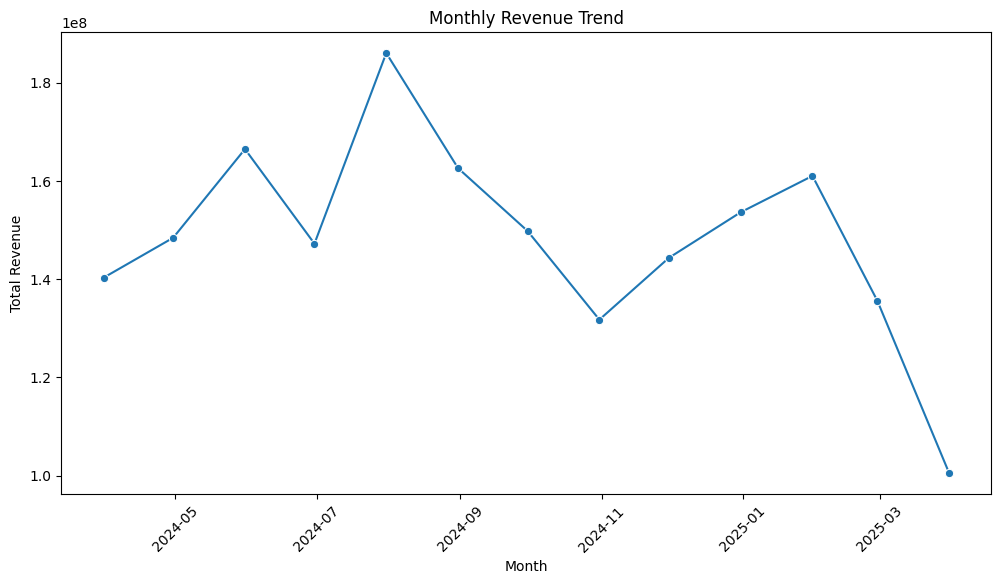

In [ ]:
# Monthly sales trend
import seaborn as sns
import matplotlib.pyplot as plt

# Use 'ME' instead of 'M' to avoid the warning
monthly_sales = data.resample('ME', on='Date').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y='Revenue', data=monthly_sales, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


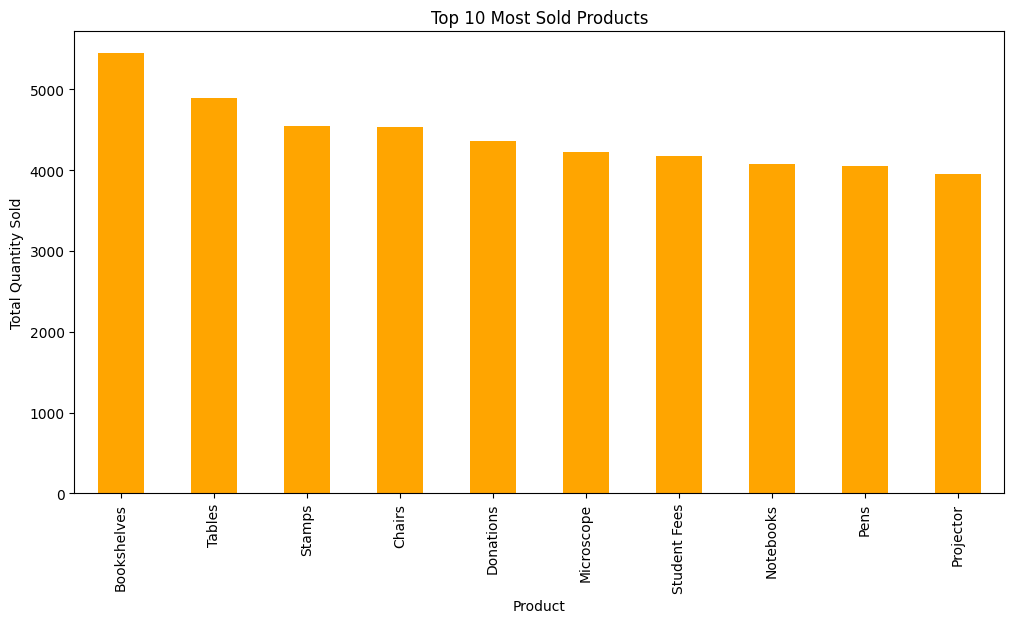

In [ ]:
# Group by product and sum the quantities
top_products = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()


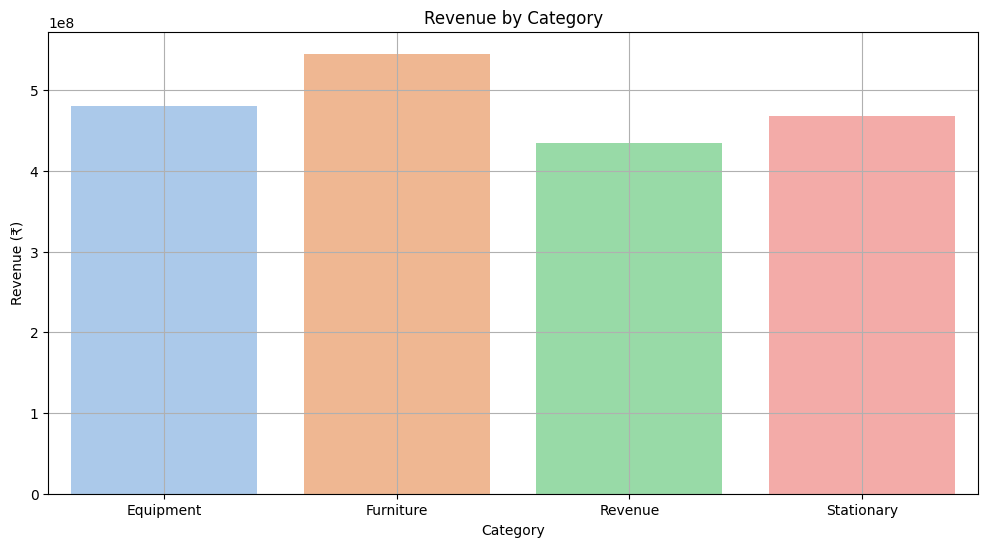

In [ ]:
# ✅ Define category_revenue before plotting
category_revenue = data.groupby('Category').agg({'Revenue': 'sum'}).reset_index()

# ✅ Plotting the revenue by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Revenue', hue='Category', data=category_revenue, palette='pastel', legend=False)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.show()


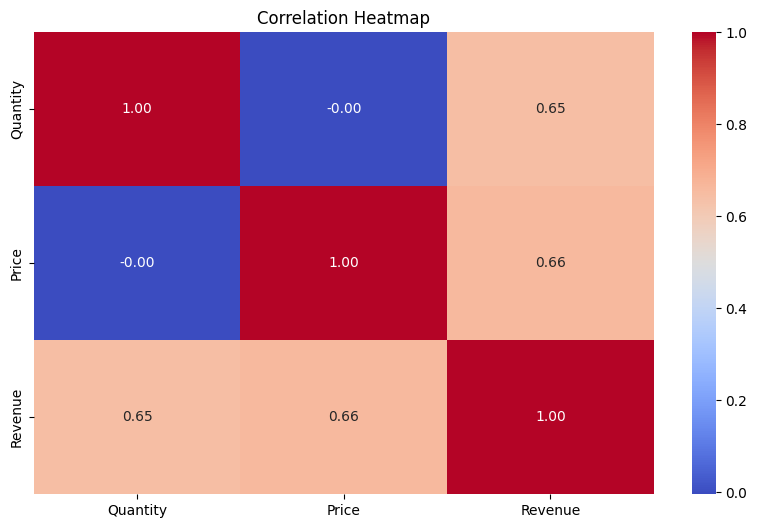

In [ ]:
# Filter only numeric columns
numeric_data = data[['Quantity', 'Price', 'Revenue']]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


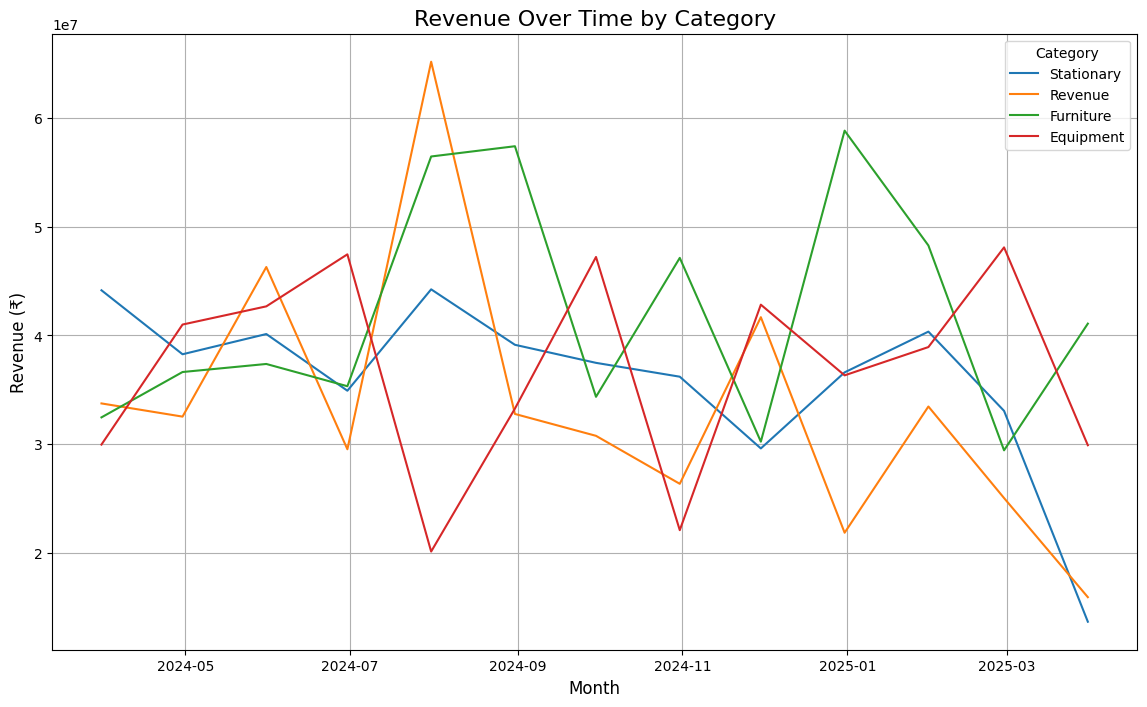

In [ ]:
# Revenue over time by category
plt.figure(figsize=(14, 8))

for category in data['Category'].unique():
    category_data = data[data['Category'] == category]
    monthly_revenue = category_data.resample('ME', on='Date').sum()
    plt.plot(monthly_revenue.index, monthly_revenue['Revenue'], label=category)

plt.title('Revenue Over Time by Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (₹)', fontsize=12)
plt.legend(title='Category')
plt.grid(True)
plt.show()


In [ ]:
# Display the first few rows to verify Cost and Profit columns
data.head()


,Date,Product,Category,Quantity,Price,Revenue
0,2024-03-01,Stamps,Stationary,29,24888,721752
1,2024-03-01,Donations,Revenue,20,37186,743720
2,2024-03-01,Cabinets,Furniture,28,14859,416052
3,2024-03-01,Tables,Furniture,39,17022,663858
4,2024-03-02,Paper Rims,Stationary,20,46393,927860


In [ ]:
import numpy as np

# ✅ Adding Cost and Profit columns again
np.random.seed(42)
data['Cost'] = data['Revenue'] * np.random.uniform(0.6, 0.9, len(data))
data['Profit'] = data['Revenue'] - data['Cost']

# Display the updated dataframe
data.head()


,Date,Product,Category,Quantity,Price,Revenue,Cost,Profit
0,2024-03-01,Stamps,Stationary,29,24888,721752,514148.723957,207603.276043
1,2024-03-01,Donations,Revenue,20,37186,743720,658351.573189,85368.426811
2,2024-03-01,Cabinets,Furniture,28,14859,416052,340995.463044,75056.536956
3,2024-03-01,Tables,Furniture,39,17022,663858,517542.067201,146315.932799
4,2024-03-02,Paper Rims,Stationary,20,46393,927860,600145.036716,327714.963284


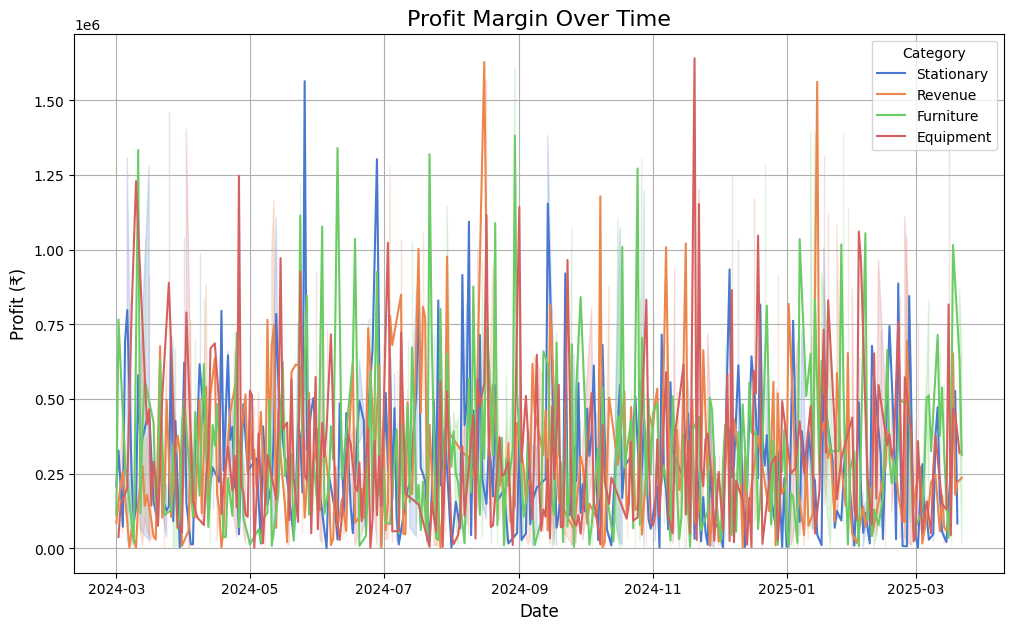

In [ ]:
# ✅ Plotting the Profit Margin
plt.figure(figsize=(12, 7))
sns.lineplot(x='Date', y='Profit', hue='Category', data=data, palette='muted')
plt.title('Profit Margin Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Profit (₹)', fontsize=12)
plt.legend(title='Category')
plt.grid(True)
plt.show()


In [ ]:
# RFM Analysis
import datetime as dt

# Simulating Recency with date range
data['Date'] = pd.to_datetime(data['Date'])

# Current date for recency calculation
current_date = data['Date'].max() + pd.Timedelta(days=1)

# RFM metrics
rfm = data.groupby('CustomerID').agg({
    'Date': lambda x: (current_date - x.max()).days,  # Recency
    'CustomerID': 'count',                            # Frequency
    'Revenue': 'sum'                                   # Monetary
}).rename(columns={'Date': 'Recency', 'CustomerID': 'Frequency', 'Revenue': 'Monetary'})

# Display the RFM table
rfm.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,1000,11,36,35149619
1,1001,12,35,46469248
2,1002,9,30,34417641
3,1003,30,26,26516210
4,1004,16,34,43314854


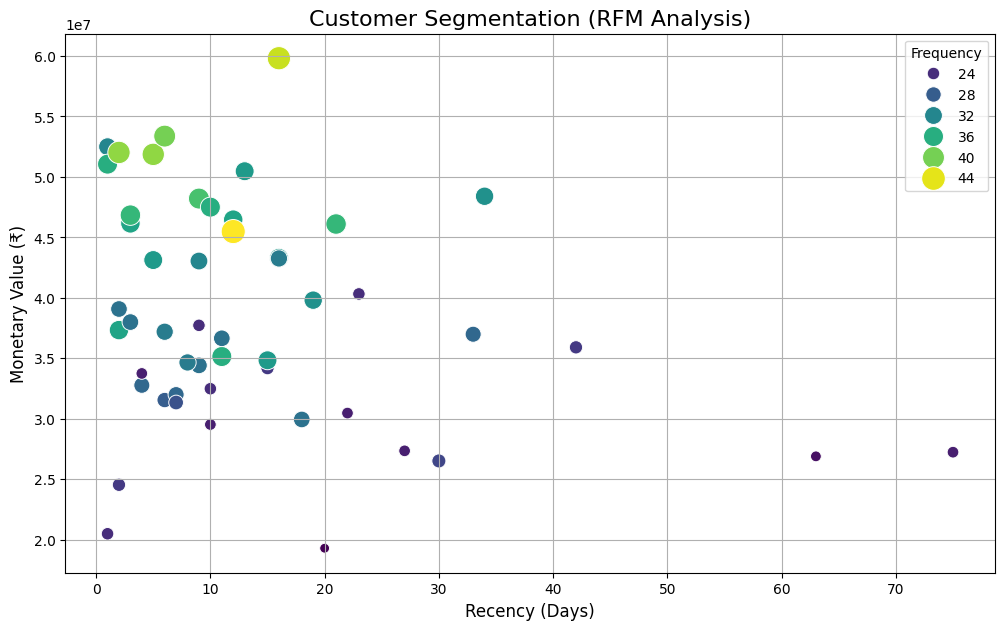

In [ ]:
# Scatter plot of RFM segments
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', hue='Frequency', data=rfm, palette='viridis', sizes=(50, 300))
plt.title('Customer Segmentation (RFM Analysis)', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Monetary Value (₹)', fontsize=12)
plt.legend(title='Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Resample data monthly and calculate total revenue
monthly_trend = data.resample('ME', on='Date').sum().reset_index()

# Display the monthly trend
monthly_trend[['Date', 'Revenue']].head()


,Date,Revenue
0,2024-03-31,140294958
1,2024-04-30,148414757
2,2024-05-31,166468019
3,2024-06-30,147211513
4,2024-07-31,186013378


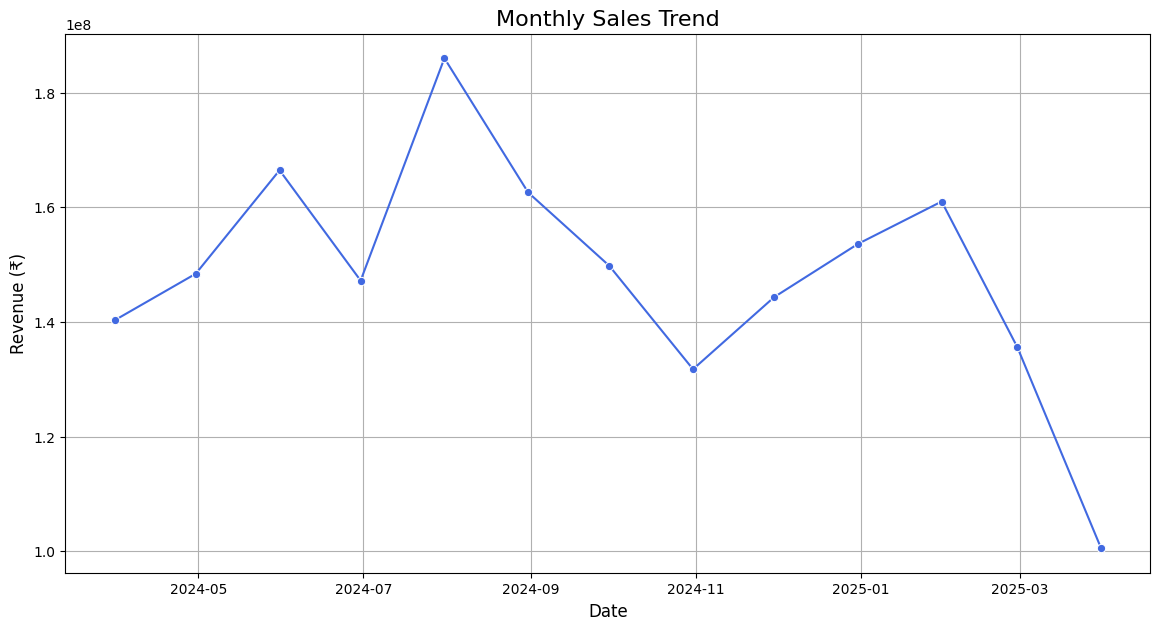

In [ ]:
# Plot monthly sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Revenue', data=monthly_trend, marker='o', color='royalblue')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue (₹)', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
!pip install scikit-learn


In [ ]:
import sys
sys.executable


'C:\\Users\\powerX\\AppData\\Local\\Programs\\Python\\Python313\\python.exe'

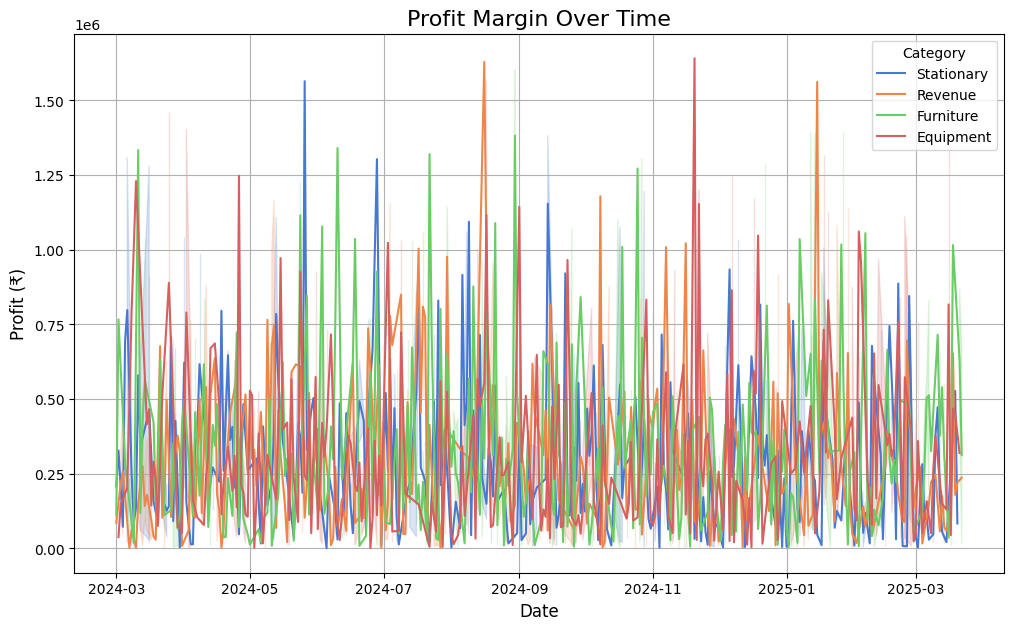

In [ ]:
# Adding Cost and Profit columns
import numpy as np

# Generate random cost values (60-90% of revenue)
np.random.seed(42)
data['Cost'] = data['Revenue'] * np.random.uniform(0.6, 0.9, len(data))
data['Profit'] = data['Revenue'] - data['Cost']

# Plot profit margin
plt.figure(figsize=(12, 7))
sns.lineplot(x='Date', y='Profit', hue='Category', data=data, palette='muted')
plt.title('Profit Margin Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Profit (₹)', fontsize=12)
plt.legend(title='Category')
plt.grid(True)
plt.show()


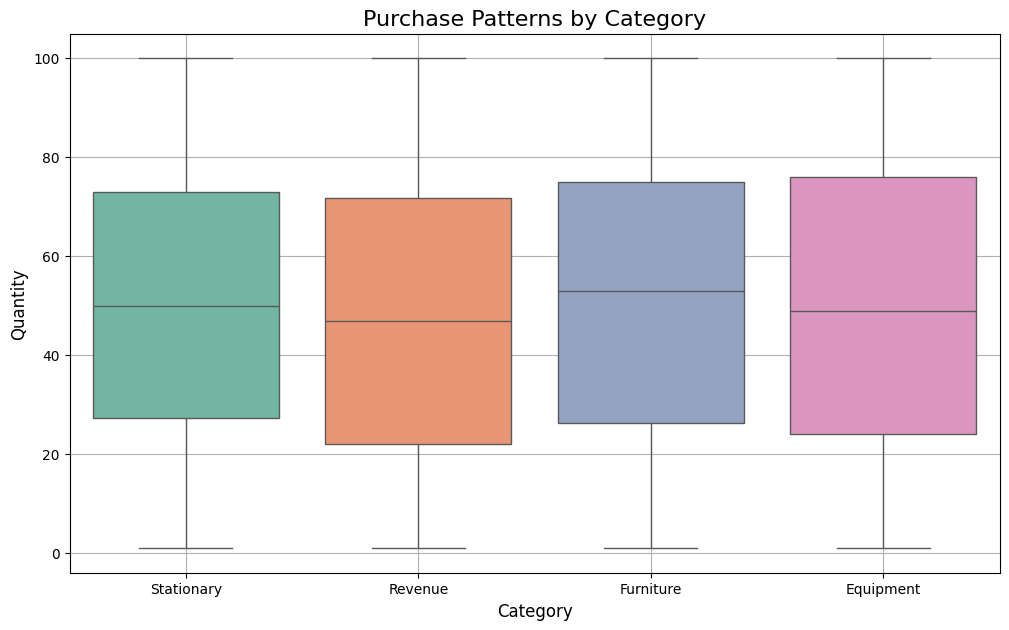

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Quantity', data=data, hue='Category', palette='Set2', legend=False)
plt.title('Purchase Patterns by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
data.describe()


,Date,Quantity,Price,Revenue,Cost,Profit,CustomerID
count,1541,1541.000000,1541.000000,1.541000e+03,1.541000e+03,1.541000e+03,1541.000000
mean,2024-09-10 15:04:33.329007104,49.926022,25092.881246,1.250853e+06,9.366304e+05,3.142227e+05,1024.656067
min,2024-03-01 00:00:00,1.000000,168.000000,2.810000e+03,2.028453e+03,5.753173e+02,1000.000000
25%,2024-06-07 00:00:00,24.000000,12705.000000,3.852060e+05,2.864887e+05,8.078175e+04,1012.000000
50%,2024-09-11 00:00:00,50.000000,24927.000000,9.604560e+05,6.925588e+05,2.245546e+05,1025.000000
75%,2024-12-17 00:00:00,74.000000,37694.000000,1.864500e+06,1.391890e+06,4.498679e+05,1036.000000
max,2025-03-22 00:00:00,100.000000,49992.000000,4.940694e+06,4.044372e+06,1.641314e+06,1049.000000
std,NaN,28.691842,14344.858358,1.080847e+06,8.230281e+05,3.042749e+05,14.333226


In [ ]:
data['Category'].value_counts()


Category
Furniture     418
Equipment     375
Stationary    374
Revenue       374
Name: count, dtype: int64

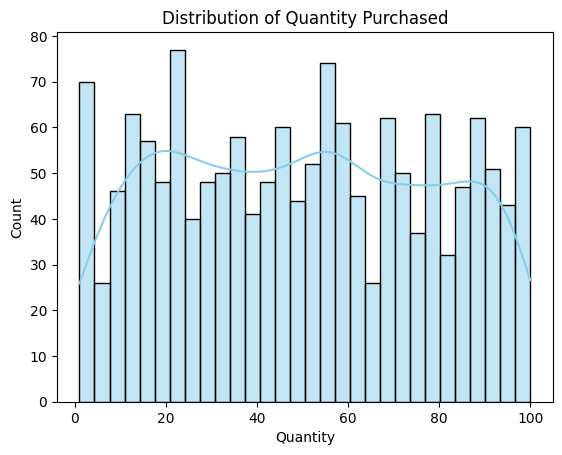

In [ ]:
sns.histplot(data['Quantity'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Quantity Purchased')
plt.show()


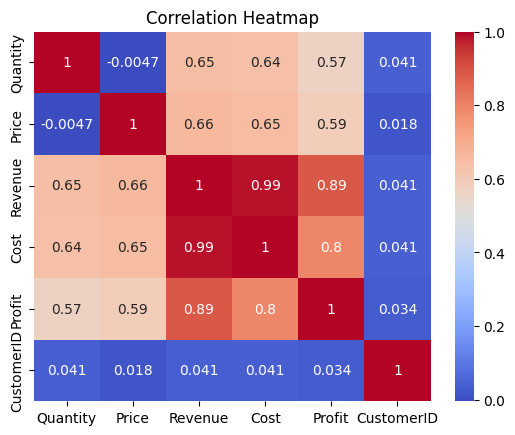

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [3]:
import pandas as pd

# Replace with your CSV file path
file_path = r'C:\Users\powerX\Downloads\college_sales_large.csv'
data = pd.read_csv(file_path)

# Check if the data is loaded correctly
print(data.head())


         Date     Product    Category  Quantity  Price  Revenue
0  2024-03-01      Stamps  Stationary        29  24888   721752
1  2024-03-01   Donations     Revenue        20  37186   743720
2  2024-03-01    Cabinets   Furniture        28  14859   416052
3  2024-03-01      Tables   Furniture        39  17022   663858
4  2024-03-02  Paper Rims  Stationary        20  46393   927860
